In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
orig_patients_df = pd.read_csv("C:/Users/kandu/Documents/Data Analysis Projects/Claims Denial Prediction/data/raw_new/patients.csv")
orig_claims_df = pd.read_csv("C:/Users/kandu/Documents/Data Analysis Projects/Claims Denial Prediction/data/raw_new/claims.csv")
orig_payers_df = pd.read_csv("C:/Users/kandu/Documents/Data Analysis Projects/Claims Denial Prediction/data/raw_new/payers.csv")
orig_providers_df = pd.read_csv("C:/Users/kandu/Documents/Data Analysis Projects/Claims Denial Prediction/data/raw_new/providers.csv")
orig_revenue_df = pd.read_csv("C:/Users/kandu/Documents/Data Analysis Projects/Claims Denial Prediction/data/raw_new/revenue.csv")
orig_externalfact_df = pd.read_csv("C:/Users/kandu/Documents/Data Analysis Projects/Claims Denial Prediction/data/raw_new/external_factors.csv")

In [3]:
print(orig_patients_df.info())
print(orig_claims_df.info())
print(orig_payers_df.info())
print(orig_providers_df.info())
print(orig_revenue_df.info())
print(orig_externalfact_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   PatientID      10000 non-null  object
 1   Age            10000 non-null  int64 
 2   Gender         10000 non-null  object
 3   City           10000 non-null  object
 4   State          10000 non-null  object
 5   InsuranceType  10000 non-null  object
dtypes: int64(1), object(5)
memory usage: 468.9+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ClaimID         50000 non-null  object 
 1   PatientID       50000 non-null  object 
 2   PayerID         50000 non-null  object 
 3   ProviderID      50000 non-null  object 
 4   ClaimAmount     50000 non-null  float64
 5   Reimbursement   50000 non-null  float64
 6   DenialStatus    50

In [4]:
print(orig_patients_df.describe())
print(orig_claims_df.describe())
print(orig_payers_df.describe())
print(orig_revenue_df.describe())
print(orig_externalfact_df.describe())

                Age
count  10000.000000
mean      53.418300
std       20.795893
min       18.000000
25%       35.000000
50%       53.000000
75%       71.000000
max       89.000000
        ClaimAmount  Reimbursement
count  50000.000000   50000.000000
mean    5070.530641    3421.662119
std     2859.353539    2462.731736
min      100.020000       0.000000
25%     2594.402500    1262.337500
50%     5074.420000    3279.315000
75%     7549.197500    5255.067500
max     9999.840000    9954.850000
       ReimbursementRate
count          50.000000
mean            0.749800
std             0.148825
min             0.510000
25%             0.632500
50%             0.720000
75%             0.870000
max             1.000000
       TotalRevenue  ClaimsProcessed  PatientsServed
count  3.600000e+01        36.000000       36.000000
mean   4.752308e+06      1388.888889     1295.000000
std    7.326048e+05       211.776672      192.791671
min    7.774786e+05       240.000000      239.000000
25%    4.761476

In [5]:
print(orig_patients_df.head())
print(orig_claims_df.head())
print(orig_payers_df.head())
print(orig_providers_df.head())
print(orig_revenue_df.head())
print(orig_externalfact_df.head())

  PatientID  Age  Gender          City State InsuranceType
0    P00001   72    Male    Chavezfurt    SC    Government
1    P00002   53  Female   Hollandview    MN       Private
2    P00003   54  Female  Port Lindsey    NM    Government
3    P00004   31  Female   Travismouth    IN       Private
4    P00005   44    Male  Barrychester    KS    Government
   ClaimID PatientID PayerID ProviderID  ClaimAmount  Reimbursement  \
0  C000001    P02949   PY039     PR0388      6188.33        5860.73   
1  C000002    P03936   PY038     PR0253      4516.85        2678.98   
2  C000003    P06831   PY033     PR0244      7085.31           0.00   
3  C000004    P03710   PY042     PR0038      5853.90        3390.23   
4  C000005    P01290   PY023     PR0014      3015.11           0.00   

  DenialStatus ServiceDate SubmissionDate ProcessedDate  
0           No    9/3/2022      10/1/2022     10/8/2022  
1           No   12/6/2022     12/15/2022    12/22/2022  
2          Yes   11/5/2023      11/8/2023    

In [6]:
patients_df = orig_patients_df.copy()
claims_df = orig_claims_df.copy()
payers_df = orig_payers_df.copy()
providers_df = orig_providers_df.copy()
revenue_df = orig_revenue_df.copy()
externalfact_df = orig_externalfact_df.copy()

In [7]:
#Convert to datetime
claims_df['ServiceDate'] = pd.to_datetime(claims_df['ServiceDate'])
claims_df['SubmissionDate'] = pd.to_datetime(claims_df['SubmissionDate'])
claims_df['ProcessedDate'] = pd.to_datetime(claims_df['ProcessedDate'])

In [8]:
# Convert to datetime
revenue_df['MonthID'] = pd.to_datetime(revenue_df['MonthID'], format='%Y-%m')
externalfact_df['MonthID'] = pd.to_datetime(externalfact_df['MonthID'], format='%Y-%m')

# Convert to Period (Year-Month)
revenue_df['MonthID'] = revenue_df['MonthID'].dt.to_period('M')
externalfact_df['MonthID'] = externalfact_df['MonthID'].dt.to_period('M')

In [9]:
print(revenue_df.head())

   MonthID  TotalRevenue  ClaimsProcessed  PatientsServed
0  2022-01     777478.64              240             239
1  2022-02    3840660.15             1097            1045
2  2022-03    4812872.62             1471            1361
3  2022-04    5000918.17             1485            1371
4  2022-05    5278201.83             1556            1444


In [10]:
#Handling missing values
print(patients_df.isnull().sum())
print(claims_df.isnull().sum())
print(payers_df.isnull().sum())
print(providers_df.isnull().sum())
print(revenue_df.isnull().sum())
print(externalfact_df.isnull().sum())

PatientID        0
Age              0
Gender           0
City             0
State            0
InsuranceType    0
dtype: int64
ClaimID           0
PatientID         0
PayerID           0
ProviderID        0
ClaimAmount       0
Reimbursement     0
DenialStatus      0
ServiceDate       0
SubmissionDate    0
ProcessedDate     0
dtype: int64
PayerID              0
PayerName            0
PayerCategory        0
ReimbursementRate    0
dtype: int64
ProviderID      0
ProviderName    0
Specialty       0
City            0
State           0
dtype: int64
MonthID            0
TotalRevenue       0
ClaimsProcessed    0
PatientsServed     0
dtype: int64
MonthID           0
InflationRate     0
PublicEvents     25
PolicyChanges    31
dtype: int64


In [11]:
#Filling null values 
externalfact_df['PublicEvents'] = externalfact_df['PublicEvents'].fillna("No Events")
externalfact_df['PolicyChanges'] = externalfact_df['PolicyChanges'].fillna("No Changes")

In [12]:
#Duplicate values
print(patients_df.duplicated().sum())
print(claims_df.duplicated().sum())
print(payers_df.duplicated().sum())
print(providers_df.duplicated().sum())
print(revenue_df.duplicated().sum())
print(externalfact_df.duplicated().sum())

0
0
0
0
0
0


In [13]:
#Data validation
claims_df = claims_df[claims_df['PatientID'].isin(patients_df['PatientID'])]
claims_df = claims_df[claims_df['PayerID'].isin(payers_df['PayerID'])]
claims_df = claims_df[claims_df['ProviderID'].isin(providers_df['ProviderID'])]
claims_df = claims_df[claims_df['ServiceDate']<claims_df['SubmissionDate']]
claims_df = claims_df[claims_df['SubmissionDate']<claims_df['ProcessedDate']]
claims_df = claims_df[claims_df['ClaimAmount']>=claims_df['Reimbursement']]

In [14]:
claims_df.shape

(50000, 10)

In [15]:
deniedreimbursement = claims_df['Reimbursement'].where(claims_df['DenialStatus'] == 'Yes')

In [16]:
deniedreimbursement.unique()

array([nan,  0.])

In [17]:
claims_yearly = claims_df.groupby(claims_df['ProcessedDate'].dt.year)['ClaimID'].count()
revenueclaims_yearly = revenue_df.groupby(revenue_df['MonthID'].dt.year)['ClaimsProcessed'].sum()

In [18]:
#Claims validation across claims and revenue tables
print("Claims table count:",claims_yearly)
print("Revenue table count:",revenueclaims_yearly)

Claims table count: ProcessedDate
2022    15725
2023    17216
2024    17059
Name: ClaimID, dtype: int64
Revenue table count: MonthID
2022    15725
2023    17216
2024    17059
Name: ClaimsProcessed, dtype: int64


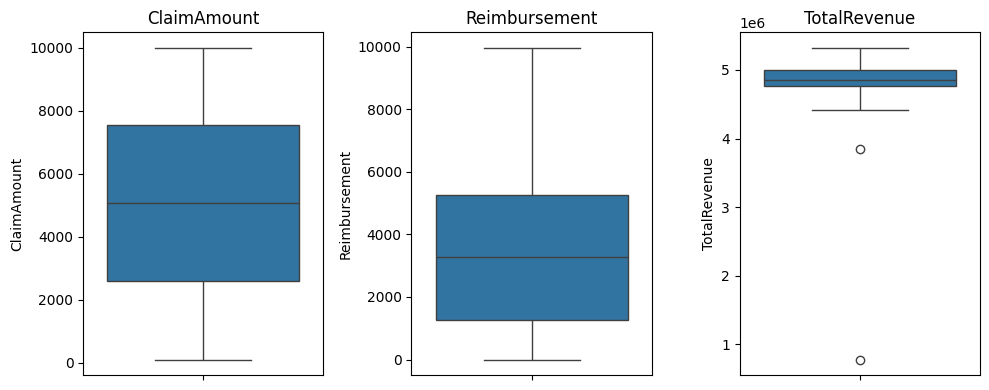

In [19]:
#Outlier Detection

fig,axes= plt.subplots(1,3,figsize = (10,4))

sns.boxplot(y='ClaimAmount',data=claims_df,ax=axes[0])
axes[0].set_title('ClaimAmount')
sns.boxplot(y='Reimbursement',data=claims_df,ax=axes[1])
axes[1].set_title('Reimbursement')
sns.boxplot(y='TotalRevenue',data=revenue_df,ax=axes[2])
axes[2].set_title('TotalRevenue')

plt.tight_layout()
plt.show()

In [20]:
#Feature Engineering

claims_df['SubmissionQuarter'] = claims_df['SubmissionDate'].dt.quarter
claims_df['SubmissionMonth'] = claims_df['SubmissionDate'].dt.month
claims_df['SubmissionWeekday'] = claims_df['SubmissionDate'].dt.weekday
claims_df['ProcessedQuarter'] = claims_df['ProcessedDate'].dt.quarter
claims_df['ProcessedMonth'] = claims_df['ProcessedDate'].dt.month
claims_df['ProcessedWeekday'] = claims_df['ProcessedDate'].dt.weekday

In [21]:
claims_df = claims_df.merge(payers_df[['PayerID','ReimbursementRate']],on='PayerID',how='left')
claims_df.rename(columns={'ReimbursementRate':'Payer_ReimbursementRate'},inplace=True)

In [22]:
claims_df['ClaimValueProportion'] = (claims_df['Reimbursement']/claims_df['ClaimAmount']).round(2)
claims_df['SubmissionDelay'] = (claims_df['SubmissionDate'] - claims_df['ServiceDate']).dt.days
claims_df['ProcessingDelay'] = (claims_df['ProcessedDate'] - claims_df['SubmissionDate']).dt.days

In [23]:
#claims_df['DelayRatio'] = (claims_df['SubmissionDelay']/claims_df['ProcessingDelay']).round(2)
claims_df['CTR_Ratio'] = ((claims_df['ClaimAmount']-claims_df['Reimbursement'])/claims_df['ClaimAmount']).round(2)

In [24]:
payer_denied_claims = claims_df[claims_df['DenialStatus'] == 'Yes'].groupby(claims_df['PayerID'])['ClaimID'].count()
payer_total_claims = claims_df.groupby(claims_df['PayerID'])['ClaimID'].count()
payer_denial_rate = (payer_denied_claims/payer_total_claims).round(2).reset_index(name='Payer_DenialRate')

In [25]:
claims_df = claims_df.merge(payer_denial_rate,on='PayerID',how='left')

In [26]:
avgreimbursed_rate_by_payer = claims_df.groupby(claims_df['PayerID'])['Reimbursement'].mean().round(2).reset_index()
avgreimbursed_rate_by_payer.rename(columns={'Reimbursement':'Payer_AvgReimbursementRate'},inplace=True)

In [27]:
claims_df = claims_df.merge(avgreimbursed_rate_by_payer,on='PayerID',how='left')

In [28]:
claims_df['Payer_DenialImpact'] = (claims_df['Payer_DenialRate']*(1-claims_df['Payer_ReimbursementRate'])).round(2)

In [29]:
#avgclaim_by_patient = claims_df.groupby(claims_df['PatientID'])['ClaimAmount'].mean().round(2).reset_index()
#avgclaim_by_patient.rename(columns={'ClaimAmount':'Patient_AvgClaimAmount'},inplace=True)

In [30]:
#claims_df = claims_df.merge(avgclaim_by_patient,on='PatientID',how='left')

In [31]:
patient_denied_claims = claims_df[claims_df['DenialStatus'] == 'Yes'].groupby(claims_df['PatientID'])['ClaimID'].count()
patient_total_claims = claims_df.groupby(claims_df['PatientID'])['ClaimID'].count()
patient_denial_rate = (patient_denied_claims/patient_total_claims).round(2).reset_index(name='Patient_DenialRate')

In [32]:
claims_df = claims_df.merge(patient_denial_rate,on='PatientID',how='left')
claims_df['Patient_DenialRate'] = claims_df['Patient_DenialRate'].fillna(0.00)

In [33]:
provider_denied_claims = claims_df[claims_df['DenialStatus'] == 'Yes'].groupby(claims_df['ProviderID'])['ClaimID'].count()
provider_total_claims = claims_df.groupby(claims_df['ProviderID'])['ClaimID'].count()
provider_denial_rate = (provider_denied_claims/provider_total_claims).round(2).reset_index(name='Provider_DenialRate')
#provider_total_claims = provider_total_claims.reset_index(name='Provider_TotalClaims')

In [34]:
claims_df = claims_df.merge(provider_denial_rate,on='ProviderID',how='left')
#claims_df = claims_df.merge(provider_total_claims,on='ProviderID',how='left')

In [35]:
revenue_df['RevenuePerPatient'] = (revenue_df['TotalRevenue']/revenue_df['PatientsServed']).round(2)

In [36]:
#Encoding
from sklearn.preprocessing import LabelEncoder

#Label Encoding
le = LabelEncoder()
patients_df['Gender'] = le.fit_transform(patients_df['Gender'])
patients_df['InsuranceType'] = le.fit_transform(patients_df['InsuranceType'])
claims_df['DenialStatus'] = le.fit_transform(claims_df['DenialStatus'])
payers_df['PayerCategory'] = le.fit_transform(payers_df['PayerCategory'])

#One-Hot Encoding
providers_df = pd.get_dummies(providers_df,columns=['Specialty'],dtype='int')

#Frequency Encoding
freq_publicencoding = externalfact_df['PublicEvents'].value_counts().to_dict()
freq_policyencoding = externalfact_df['PolicyChanges'].value_counts().to_dict()
externalfact_df['PublicEventsEncoded'] = externalfact_df['PublicEvents'].map(freq_publicencoding)
externalfact_df['PolicyChangesEncoded'] = externalfact_df['PolicyChanges'].map(freq_policyencoding)

In [37]:
#Scaling

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

#StandardScaling
sscaler = StandardScaler()
claims_df[['ClaimAmount','Reimbursement','ClaimValueProportion', 'SubmissionDelay', 'ProcessingDelay', 
                'CTR_Ratio', 'Payer_DenialRate','Payer_ReimbursementRate', 'Payer_DenialImpact','Patient_DenialRate',
                  'Provider_DenialRate','Payer_AvgReimbursementRate']] = sscaler.fit_transform(claims_df[['ClaimAmount','Reimbursement','ClaimValueProportion', 
                                                                             'SubmissionDelay', 'ProcessingDelay', 'CTR_Ratio', 
                                                                             'Payer_DenialRate','Payer_ReimbursementRate', 'Payer_DenialImpact',
                                                                             'Patient_DenialRate','Provider_DenialRate','Payer_AvgReimbursementRate']])
patients_df[['Age']] = sscaler.fit_transform(patients_df[['Age']])
#revenue_df[['TotalRevenue','RevenuePerPatient','ClaimsProcessed','PatientsServed']] = sscaler.fit_transform(revenue_df[['TotalRevenue',
                                                                                        #'RevenuePerPatient','ClaimsProcessed','PatientsServed']])
externalfact_df[['InflationRate']] = sscaler.fit_transform(externalfact_df[['InflationRate']])

In [38]:
new_claims_df = claims_df[['ClaimAmount',
       'Reimbursement', 'DenialStatus',  'Payer_ReimbursementRate', 'ClaimValueProportion',
       'SubmissionDelay', 'ProcessingDelay', 'CTR_Ratio',
       'Payer_DenialRate', 'Payer_AvgReimbursementRate', 'Payer_DenialImpact', 'Patient_DenialRate', 'Provider_DenialRate',
       ]].copy()

In [39]:
claims_corrmatrix = new_claims_df.corr()

In [40]:
claims_corrmatrix

,ClaimAmount,Reimbursement,DenialStatus,Payer_ReimbursementRate,ClaimValueProportion,SubmissionDelay,ProcessingDelay,CTR_Ratio,Payer_DenialRate,Payer_AvgReimbursementRate,Payer_DenialImpact,Patient_DenialRate,Provider_DenialRate
ClaimAmount,1.000000,0.783582,-0.001854,0.005439,0.001705,0.001326,-0.002272,-0.001705,0.002817,0.024725,-0.005100,0.003298,0.007747
Reimbursement,0.783582,1.000000,-0.461791,0.001308,0.541745,0.002376,-0.001574,-0.541745,-0.011263,0.029306,-0.001876,-0.200468,-0.037694
DenialStatus,-0.001854,-0.461791,1.000000,0.004198,-0.853128,-0.002380,-0.000454,0.853128,0.024461,-0.012079,-0.002091,0.438595,0.098646
Payer_ReimbursementRate,0.005439,0.001308,0.004198,1.000000,-0.004641,-0.000274,0.004127,0.004641,0.188125,0.044641,-0.972469,0.005914,0.007650
ClaimValueProportion,0.001705,0.541745,-0.853128,-0.004641,1.000000,0.003041,0.001308,-1.000000,-0.027838,0.018502,0.002193,-0.376627,-0.082314
SubmissionDelay,0.001326,0.002376,-0.002380,-0.000274,0.003041,1.000000,-0.006262,-0.003041,-0.001966,-0.002852,0.000437,0.001134,0.007369
ProcessingDelay,-0.002272,-0.001574,-0.000454,0.004127,0.001308,-0.006262,1.000000,-0.001308,-0.000678,0.006157,-0.003788,0.004574,0.005214
CTR_Ratio,-0.001705,-0.541745,0.853128,0.004641,-1.000000,-0.003041,-0.001308,1.000000,0.027838,-0.018502,-0.002193,0.376627,0.082314
Payer_DenialRate,0.002817,-0.011263,0.024461,0.188125,-0.027838,-0.001966,-0.000678,0.027838,1.000000,-0.384344,-0.092043,0.011202,0.006454
Payer_AvgReimbursementRate,0.024725,0.029306,-0.012079,0.044641,0.018502,-0.002852,0.006157,-0.018502,-0.384344,1.000000,-0.064022,-0.003059,-0.007348


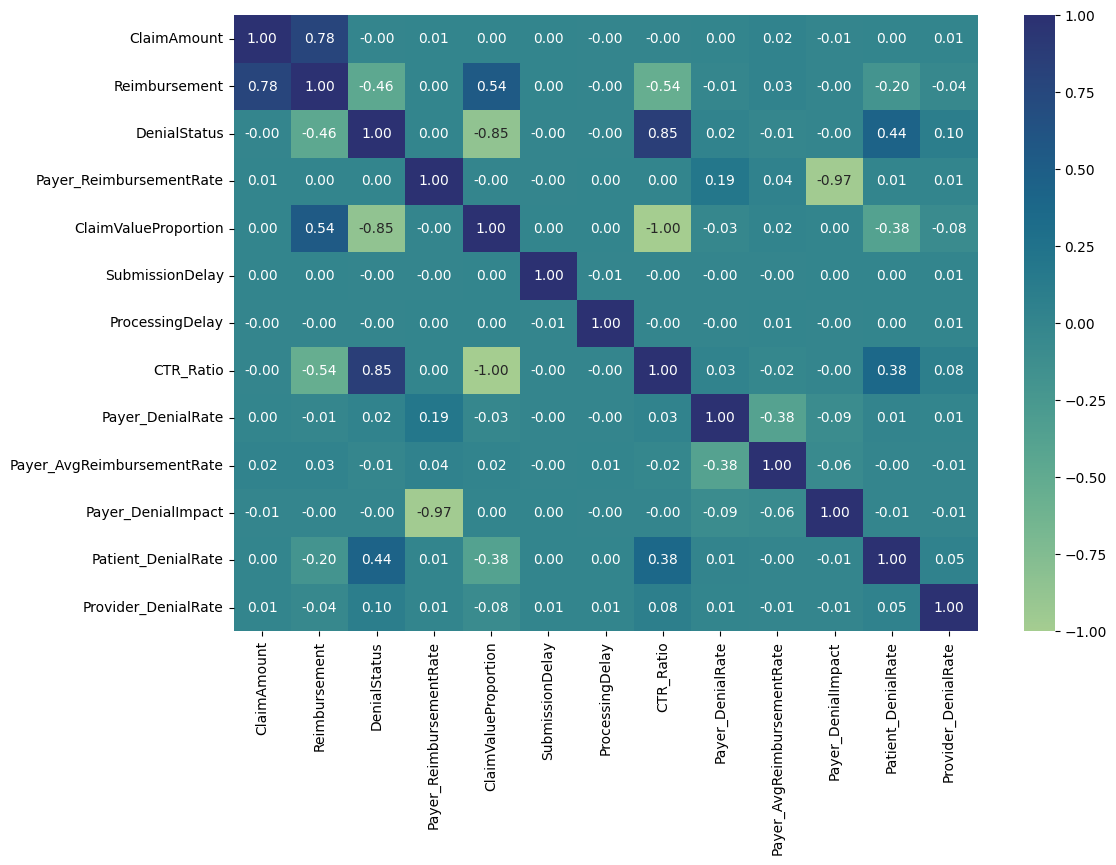

In [41]:
plt.figure(figsize=(12,8))
sns.heatmap(claims_corrmatrix,annot=True,cmap='crest',fmt=".2f")
plt.show()

In [42]:
claims_df = claims_df.drop(columns=['CTR_Ratio','ClaimValueProportion','Payer_DenialImpact'])

In [43]:
#Handling missing values
print(patients_df.isnull().sum())
print(claims_df.isnull().sum())
print(payers_df.isnull().sum())
print(providers_df.isnull().sum())
print(revenue_df.isnull().sum())
print(externalfact_df.isnull().sum())

PatientID        0
Age              0
Gender           0
City             0
State            0
InsuranceType    0
dtype: int64
ClaimID                       0
PatientID                     0
PayerID                       0
ProviderID                    0
ClaimAmount                   0
Reimbursement                 0
DenialStatus                  0
ServiceDate                   0
SubmissionDate                0
ProcessedDate                 0
SubmissionQuarter             0
SubmissionMonth               0
SubmissionWeekday             0
ProcessedQuarter              0
ProcessedMonth                0
ProcessedWeekday              0
Payer_ReimbursementRate       0
SubmissionDelay               0
ProcessingDelay               0
Payer_DenialRate              0
Payer_AvgReimbursementRate    0
Patient_DenialRate            0
Provider_DenialRate           0
dtype: int64
PayerID              0
PayerName            0
PayerCategory        0
ReimbursementRate    0
dtype: int64
ProviderID         

In [44]:
#Duplicate values
print(patients_df.duplicated().sum())
print(claims_df.duplicated().sum())
print(payers_df.duplicated().sum())
print(providers_df.duplicated().sum())
print(revenue_df.duplicated().sum())
print(externalfact_df.duplicated().sum())

0
0
0
0
0
0


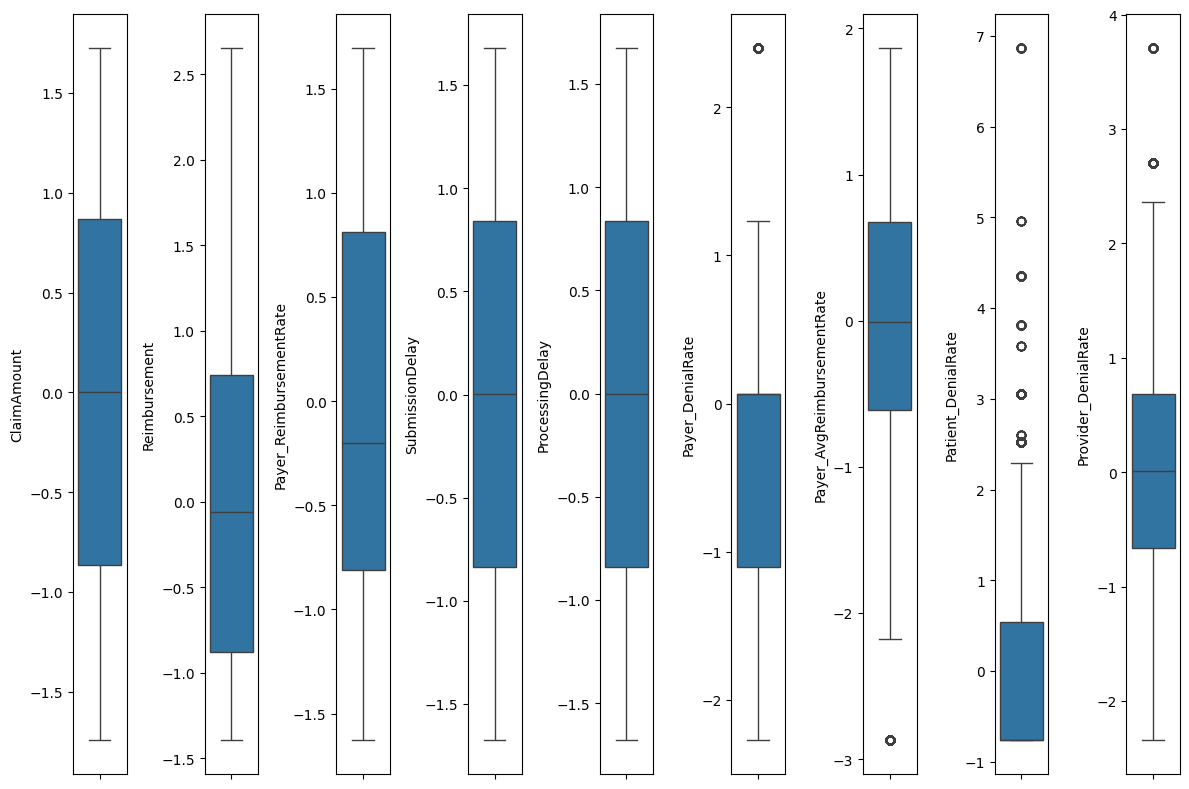

In [45]:
plt.figure(figsize=(12,8))

columns = ['ClaimAmount', 'Reimbursement', 'Payer_ReimbursementRate',
       'SubmissionDelay', 'ProcessingDelay', 'Payer_DenialRate',
       'Payer_AvgReimbursementRate', 
       'Patient_DenialRate', 'Provider_DenialRate']

for i,col in enumerate(columns,1):
    plt.subplot(1,len(columns),i)
    sns.boxplot(y=claims_df[col])
    #plt.title(col)
plt.tight_layout()
plt.show()

In [46]:
for col in ['Payer_DenialRate', 'Payer_AvgReimbursementRate', 'Patient_DenialRate', 'Provider_DenialRate']:
    lower_limit = claims_df[col].quantile(0.05)
    upper_limit = claims_df[col].quantile(0.95)
    new_claims_df[col] = claims_df[col].clip(lower=lower_limit, upper=upper_limit)

In [47]:
patients_df['Gender'].value_counts()

Gender
1    5076
0    4924
Name: count, dtype: int64

<Axes: xlabel='Age', ylabel='Count'>

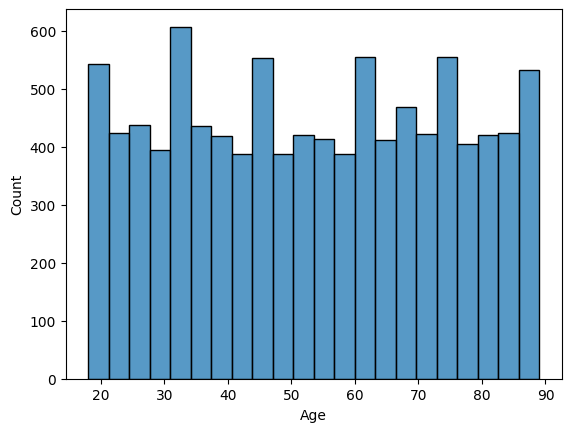

In [48]:
sns.histplot(x='Age',data=orig_patients_df)

<Axes: xlabel='ClaimAmount', ylabel='Reimbursement'>

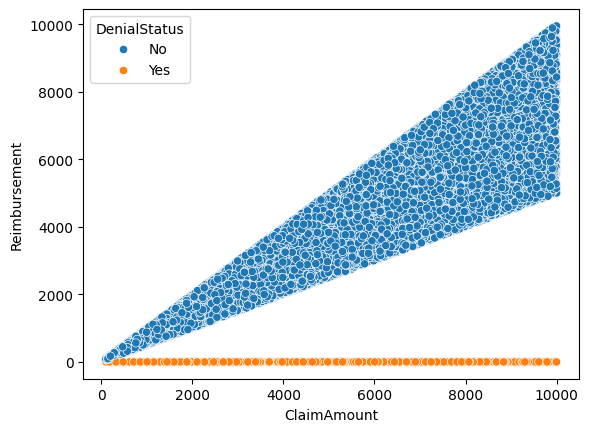

In [49]:
sns.scatterplot(x='ClaimAmount', y='Reimbursement', data=orig_claims_df,hue='DenialStatus')

Text(0, 0.5, 'Denial Rate')

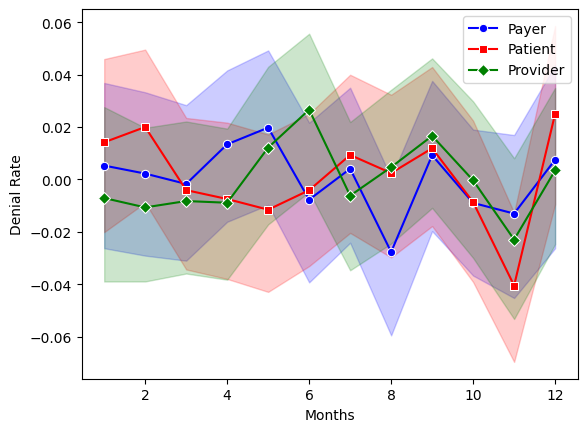

In [50]:
sns.lineplot(x='SubmissionMonth',y='Payer_DenialRate',marker='o',color='blue',label='Payer',data=claims_df)
sns.lineplot(x='SubmissionMonth',y='Patient_DenialRate',marker='s',color='red',label='Patient',data=claims_df)
sns.lineplot(x='SubmissionMonth',y='Provider_DenialRate',marker='D',color='green',label='Provider',data=claims_df)
plt.xlabel("Months")
plt.ylabel("Denial Rate")

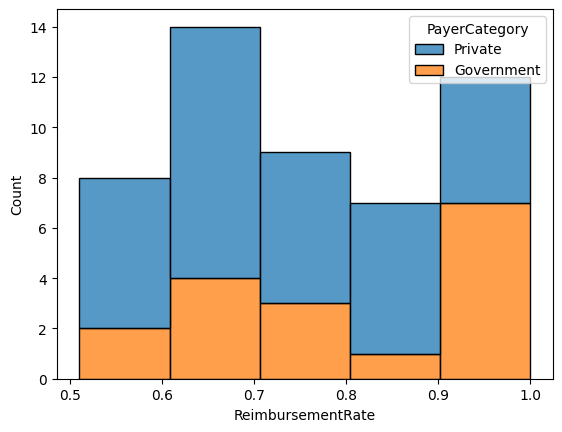

In [51]:
sns.histplot( x='ReimbursementRate', data=orig_payers_df,hue='PayerCategory',multiple='stack',bins=5)
plt.show()

In [52]:
orig_claims_df['DenialStatus'].value_counts()

DenialStatus
No     45026
Yes     4974
Name: count, dtype: int64

In [53]:
model_df = claims_df.copy()

In [54]:
model_df['MonthID'] = model_df['ProcessedDate'].dt.to_period('M')

In [55]:
model_df = model_df.merge(patients_df[['PatientID','Age','Gender','InsuranceType']],on='PatientID',how='left')
model_df = model_df.merge(payers_df[['PayerID','PayerCategory']],on='PayerID',how='left')
model_df = model_df.merge(providers_df[['ProviderID','Specialty_Cardiology','Specialty_General Medicine', 'Specialty_Neurology',
       'Specialty_Orthopedics', 'Specialty_Pediatrics']],on='ProviderID',how='left')
model_df = model_df.merge(externalfact_df[['MonthID','InflationRate','PublicEventsEncoded', 'PolicyChangesEncoded']],on='MonthID',how='left')

In [56]:
model_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   ClaimID                     50000 non-null  object        
 1   PatientID                   50000 non-null  object        
 2   PayerID                     50000 non-null  object        
 3   ProviderID                  50000 non-null  object        
 4   ClaimAmount                 50000 non-null  float64       
 5   Reimbursement               50000 non-null  float64       
 6   DenialStatus                50000 non-null  int32         
 7   ServiceDate                 50000 non-null  datetime64[ns]
 8   SubmissionDate              50000 non-null  datetime64[ns]
 9   ProcessedDate               50000 non-null  datetime64[ns]
 10  SubmissionQuarter           50000 non-null  int32         
 11  SubmissionMonth             50000 non-null  int32     

In [57]:
model_df.columns

Index(['ClaimID', 'PatientID', 'PayerID', 'ProviderID', 'ClaimAmount',
       'Reimbursement', 'DenialStatus', 'ServiceDate', 'SubmissionDate',
       'ProcessedDate', 'SubmissionQuarter', 'SubmissionMonth',
       'SubmissionWeekday', 'ProcessedQuarter', 'ProcessedMonth',
       'ProcessedWeekday', 'Payer_ReimbursementRate', 'SubmissionDelay',
       'ProcessingDelay', 'Payer_DenialRate', 'Payer_AvgReimbursementRate',
       'Patient_DenialRate', 'Provider_DenialRate', 'MonthID', 'Age', 'Gender',
       'InsuranceType', 'PayerCategory', 'Specialty_Cardiology',
       'Specialty_General Medicine', 'Specialty_Neurology',
       'Specialty_Orthopedics', 'Specialty_Pediatrics', 'InflationRate',
       'PublicEventsEncoded', 'PolicyChangesEncoded'],
      dtype='object')

In [ ]:
model_df.drop(columns=['ClaimID', 'PatientID', 'PayerID', 'ProviderID','Reimbursement', 'ServiceDate', 'SubmissionDate',
       'ProcessedDate','MonthID','SubmissionQuarter','ProcessedQuarter','SubmissionQuarter','ProcessedQuarter'],axis=1,inplace=True)

In [59]:
model_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ClaimAmount                 50000 non-null  float64
 1   DenialStatus                50000 non-null  int32  
 2   SubmissionQuarter           50000 non-null  int32  
 3   SubmissionMonth             50000 non-null  int32  
 4   SubmissionWeekday           50000 non-null  int32  
 5   ProcessedQuarter            50000 non-null  int32  
 6   ProcessedMonth              50000 non-null  int32  
 7   ProcessedWeekday            50000 non-null  int32  
 8   Payer_ReimbursementRate     50000 non-null  float64
 9   SubmissionDelay             50000 non-null  float64
 10  ProcessingDelay             50000 non-null  float64
 11  Payer_DenialRate            50000 non-null  float64
 12  Payer_AvgReimbursementRate  50000 non-null  float64
 13  Patient_DenialRate          500

In [64]:
corrmat = model_df.corr()

<Axes: >

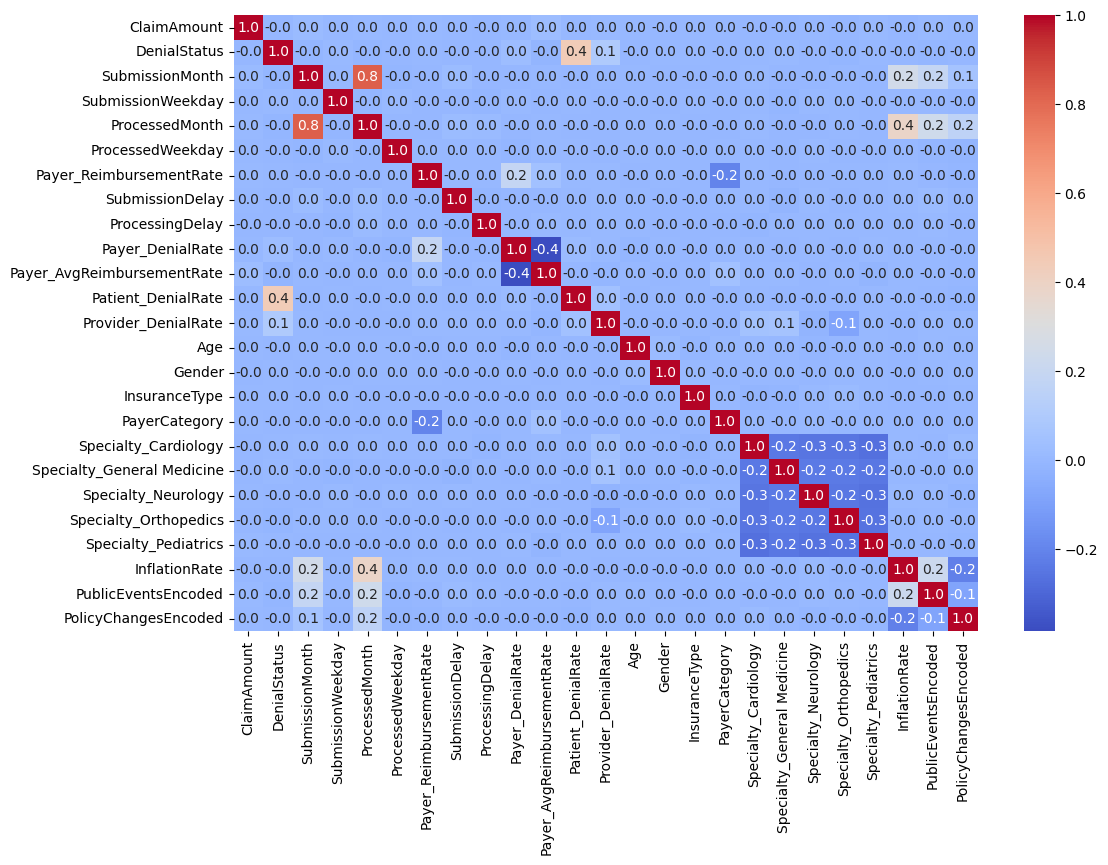

In [65]:
plt.figure(figsize=(12,8))
sns.heatmap(corrmat,annot=True,fmt='.1f',cmap='coolwarm')

In [67]:
model_df.columns

Index(['ClaimAmount', 'DenialStatus', 'SubmissionMonth', 'SubmissionWeekday',
       'ProcessedMonth', 'ProcessedWeekday', 'Payer_ReimbursementRate',
       'SubmissionDelay', 'ProcessingDelay', 'Payer_DenialRate',
       'Payer_AvgReimbursementRate', 'Patient_DenialRate',
       'Provider_DenialRate', 'Age', 'Gender', 'InsuranceType',
       'PayerCategory', 'Specialty_Cardiology', 'Specialty_General Medicine',
       'Specialty_Neurology', 'Specialty_Orthopedics', 'Specialty_Pediatrics',
       'InflationRate', 'PublicEventsEncoded', 'PolicyChangesEncoded'],
      dtype='object')

In [72]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X= model_df[['ClaimAmount', 'SubmissionMonth', 'SubmissionWeekday',
       'ProcessedMonth', 'ProcessedWeekday', 'Payer_ReimbursementRate',
       'SubmissionDelay', 'ProcessingDelay', 'Payer_DenialRate',
       'Payer_AvgReimbursementRate', 'Patient_DenialRate',
       'Provider_DenialRate', 'Age', 'Gender', 'InsuranceType',
       'PayerCategory', 'Specialty_Cardiology', 'Specialty_General Medicine',
       'Specialty_Neurology', 'Specialty_Orthopedics', 'Specialty_Pediatrics',
       'InflationRate', 'PublicEventsEncoded', 'PolicyChangesEncoded']]
y= model_df['DenialStatus']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Train a Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Feature importance
importances = rf_model.feature_importances_
feature_names = X_train.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df.sort_values(by='Importance', ascending=False, inplace=True)

print(feature_importance_df)


                       Feature  Importance
10          Patient_DenialRate    0.227576
0                  ClaimAmount    0.085657
12                         Age    0.072508
7              ProcessingDelay    0.063614
6              SubmissionDelay    0.062866
9   Payer_AvgReimbursementRate    0.056096
11         Provider_DenialRate    0.055559
5      Payer_ReimbursementRate    0.051244
21               InflationRate    0.045218
4             ProcessedWeekday    0.039980
2            SubmissionWeekday    0.039337
1              SubmissionMonth    0.037832
3               ProcessedMonth    0.034962
8             Payer_DenialRate    0.019776
13                      Gender    0.013919
22         PublicEventsEncoded    0.013449
14               InsuranceType    0.012934
15               PayerCategory    0.010961
20        Specialty_Pediatrics    0.009952
16        Specialty_Cardiology    0.009575
18         Specialty_Neurology    0.009566
19       Specialty_Orthopedics    0.009410
17  Special

In [73]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF
vif_data = pd.DataFrame()
vif_data['Feature'] = X_train.columns
vif_data['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]

print(vif_data)


                       Feature       VIF
0                  ClaimAmount  1.001503
1              SubmissionMonth  3.381500
2            SubmissionWeekday  1.000863
3               ProcessedMonth  4.011600
4             ProcessedWeekday  1.000901
5      Payer_ReimbursementRate  1.107430
6              SubmissionDelay  1.000876
7              ProcessingDelay  1.002516
8             Payer_DenialRate  1.241228
9   Payer_AvgReimbursementRate  1.202008
10          Patient_DenialRate  1.002598
11         Provider_DenialRate  1.014930
12                         Age  1.000943
13                      Gender  1.000456
14               InsuranceType  1.000823
15               PayerCategory  1.052679
16        Specialty_Cardiology  6.091956
17  Specialty_General Medicine  5.447704
18         Specialty_Neurology  5.882955
19       Specialty_Orthopedics  5.794493
20        Specialty_Pediatrics  6.292754
21               InflationRate  1.355080
22         PublicEventsEncoded  1.086350
23        Policy